In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
DATADIR = '../build/output/'
file = "TES_nt_hits_t9.csv"
file_path = DATADIR + file


In [112]:
df = pd.read_csv(file_path, header=None, comment="#", on_bad_lines="skip")

df.columns = [
    "event_id", "track_id", "particle", "parent_id",
    "time", "volume", "copy_no", "energy",
    "prev_volume", "step_no", "process"
]
df.head()

,event_id,track_id,particle,parent_id,time,volume,copy_no,energy,prev_volume,step_no,process
0,0,117,opticalphoton,0,3.74825,sipm_PV,57,0.002539,scintillator3,1,Scintillation
1,0,101,opticalphoton,0,12.79890,sipm_PV,39,0.002330,scintillator3,1,Scintillation
2,0,96,opticalphoton,0,2.64116,sipm_PV,38,0.004447,scintillator3,1,Cerenkov
3,0,77,opticalphoton,0,17.04660,sipm_PV,39,0.003948,scintillator3,1,Cerenkov
4,0,77,opticalphoton,0,17.06180,sipm_PV,39,0.003948,scintillator3,1,Cerenkov


In [113]:
sipm_counts = df.groupby("copy_no").size().reset_index(name="photon_count")

total_photons = sipm_counts["photon_count"].sum()

print(sipm_counts)
print(f"\nTotal detected photons: {total_photons}")


    copy_no  photon_count
0        32            17
1        33            14
2        34             4
3        35            16
4        36             8
5        37            19
6        38            15
7        39            20
8        56            19
9        57             7
10       58             9
11       59             9
12       60            22
13       61            14
14       62            15
15       63            16

Total detected photons: 224


In [114]:
photon_dist = np.zeros((16, 16))

In [115]:
for i in sipm_counts.to_numpy():
    # scintillator 1
    if i[0] < 8 and i[0]:
        for j in photon_dist:
            j[i[0]] += i[1]
    elif i[0] >= 8 and i[0] < 16:
        photon_dist[i[0]-8] += i[1]
    # scintillator 2 
    elif i[0] >= 16 and i[0] < 24:
        for j in photon_dist:
            j[i[0]-8] += i[1]
    elif i[0] >= 24 and i[0] < 32:
        photon_dist[i[0]-24] += i[1]
    # scintillator 3 
    elif i[0] >= 32 and i[0] < 40:
        photon_dist[i[0]-24] += i[1]
    elif i[0] >= 40 and i[0] < 48:
        for j in photon_dist:
            j[i[0] - 32] += i[1]
    # scintillator 4
    elif i[0] >= 48 and i[0] < 56:
        photon_dist[i[0]-40] += i[1]
    elif i[0] >= 56 and i[0] < 64:
        for j in photon_dist:
            j[i[0] - 56] += i[1]

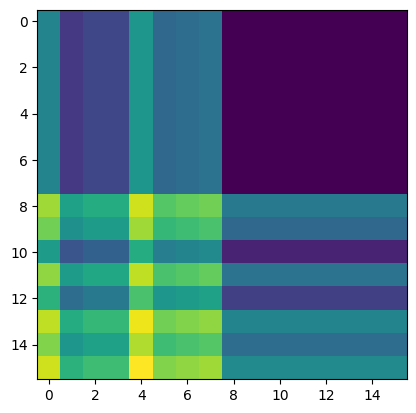

In [116]:
plt.imshow(photon_dist)